# Task 2: Predictive Analytics

In [12]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
anz = pd.read_csv('ANZ_cleaned dataset.csv')

## Correlation Matrix 

Identify the annual salary for each customer based on the 'txn_description'

In [30]:
right = anz[anz['txn_description'] == 'PAY/SALARY'].groupby('customer_id')['amount'].mean()
right = pd.DataFrame(right).reset_index()
right.rename(columns = {'amount':'salary'}, inplace = True)

In [31]:
right

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73
...,...,...
94,CUS-72755508,725.32
95,CUS-809013380,1037.07
96,CUS-860700529,1808.62
97,CUS-880898248,1433.98


In [32]:
left = pd.DataFrame(anz.groupby('customer_id').mean()).reset_index()
left.drop(['Unnamed: 0','long','lat', 'merchant_long', 'merchant_lat'], axis = 1, inplace = True)
left

,customer_id,card_present_flag,balance,age,amount,distance
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.090309
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.640604
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,204.042273
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.664837
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,794.274229
...,...,...,...,...,...,...
95,CUS-72755508,0.866667,4497.557069,35.0,197.213276,264.270591
96,CUS-809013380,0.795455,3756.902903,21.0,151.694274,2715.073302
97,CUS-860700529,0.791262,3462.276009,30.0,77.681888,203.368585
98,CUS-880898248,0.857143,8528.830385,26.0,146.954487,106.300260


In [33]:
df = left.merge(right, how = 'left')
df

,customer_id,card_present_flag,balance,age,amount,distance,salary
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.090309,970.47
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.640604,3578.65
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,204.042273,1916.51
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.664837,1711.39
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,794.274229,3903.73
...,...,...,...,...,...,...,...
95,CUS-72755508,0.866667,4497.557069,35.0,197.213276,264.270591,725.32
96,CUS-809013380,0.795455,3756.902903,21.0,151.694274,2715.073302,1037.07
97,CUS-860700529,0.791262,3462.276009,30.0,77.681888,203.368585,1808.62
98,CUS-880898248,0.857143,8528.830385,26.0,146.954487,106.300260,1433.98


In [34]:
a = anz[anz['txn_description']=='PAY/SALARY']
a = a[['customer_id','gender']].drop_duplicates().reset_index()
df = df.merge(a, how = 'left')

In [35]:
df.drop('index', axis = 1, inplace = True)
df

,customer_id,card_present_flag,balance,age,amount,distance,salary,gender
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.090309,970.47,F
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.640604,3578.65,M
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,204.042273,1916.51,M
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.664837,1711.39,F
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,794.274229,3903.73,F
...,...,...,...,...,...,...,...,...
95,CUS-72755508,0.866667,4497.557069,35.0,197.213276,264.270591,725.32,F
96,CUS-809013380,0.795455,3756.902903,21.0,151.694274,2715.073302,1037.07,F
97,CUS-860700529,0.791262,3462.276009,30.0,77.681888,203.368585,1808.62,M
98,CUS-880898248,0.857143,8528.830385,26.0,146.954487,106.300260,1433.98,M


In [36]:
#get dummy column for gender
df = pd.get_dummies(df, columns=['gender'])
df

,customer_id,card_present_flag,balance,age,amount,distance,salary,gender_F,gender_M
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.090309,970.47,1,0
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.640604,3578.65,0,1
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,204.042273,1916.51,0,1
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.664837,1711.39,1,0
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,794.274229,3903.73,1,0
...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,0.866667,4497.557069,35.0,197.213276,264.270591,725.32,1,0
96,CUS-809013380,0.795455,3756.902903,21.0,151.694274,2715.073302,1037.07,1,0
97,CUS-860700529,0.791262,3462.276009,30.0,77.681888,203.368585,1808.62,0,1
98,CUS-880898248,0.857143,8528.830385,26.0,146.954487,106.300260,1433.98,0,1


In [37]:
df.drop('gender_F',axis = 1, inplace = True)
df.head()

,customer_id,card_present_flag,balance,age,amount,distance,salary,gender_M
0,CUS-1005756958,0.812500,2275.852055,53.0,222.862603,111.090309,970.47,0
1,CUS-1117979751,0.826923,9829.929000,21.0,339.843700,717.640604,3578.65,1
2,CUS-1140341822,0.815385,5699.212250,28.0,212.632500,204.042273,1916.51,1
3,CUS-1147642491,0.750000,9032.841186,34.0,245.600169,441.664837,1711.39,0
4,CUS-1196156254,0.785276,22272.433755,34.0,147.145796,794.274229,3903.73,0


In [38]:
corr = df.drop('customer_id', axis = 1)
corr = df.corr()
corr

,card_present_flag,balance,age,amount,distance,salary,gender_M
card_present_flag,1.000000,0.011712,-0.001336,-0.262137,-0.063377,-0.134082,-0.019447
balance,0.011712,1.000000,0.231910,0.223974,-0.051122,0.161676,0.106727
age,-0.001336,0.231910,1.000000,0.150389,-0.123919,-0.192587,-0.002362
amount,-0.262137,0.223974,0.150389,1.000000,0.088830,0.197988,0.147460
distance,-0.063377,-0.051122,-0.123919,0.088830,1.000000,0.125122,0.068399
salary,-0.134082,0.161676,-0.192587,0.197988,0.125122,1.000000,0.127610
gender_M,-0.019447,0.106727,-0.002362,0.147460,0.068399,0.127610,1.000000


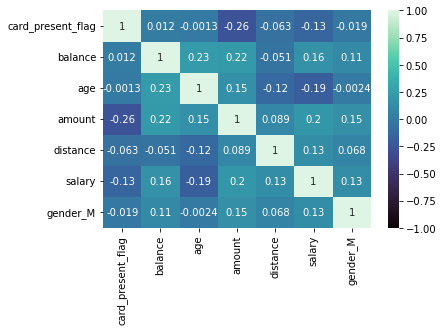

In [39]:
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'mako')
plt.show()

## Visualize interesting correlations 

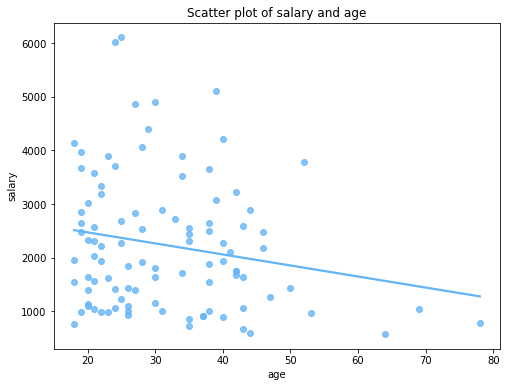

In [44]:
plt.figure(figsize=(8,6))
sns.regplot(x = 'age', y = 'salary', color = "#64b5f6", ci = None, data = df)
plt.title('Scatter plot of salary and age')
plt.show()

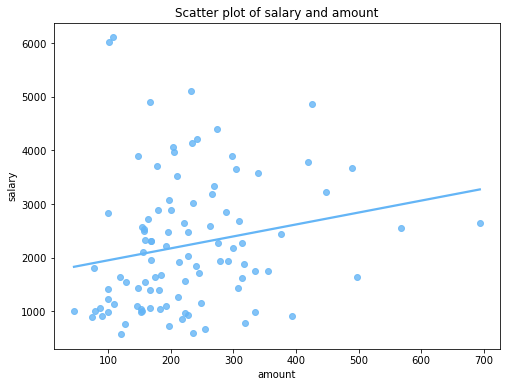

In [46]:
plt.figure(figsize=(8,6))
sns.regplot(x = 'amount', y = 'salary', color = "#64b5f6", ci = None, data = df)
plt.title('Scatter plot of salary and amount')
plt.show()

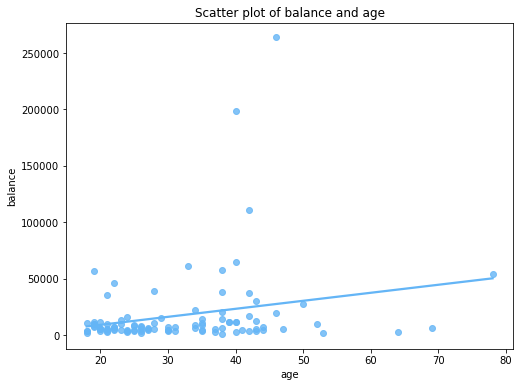

In [47]:
plt.figure(figsize=(8,6))
sns.regplot(x = 'age', y = 'balance', color = "#64b5f6", ci = None, data = df)
plt.title('Scatter plot of balance and age')
plt.show()

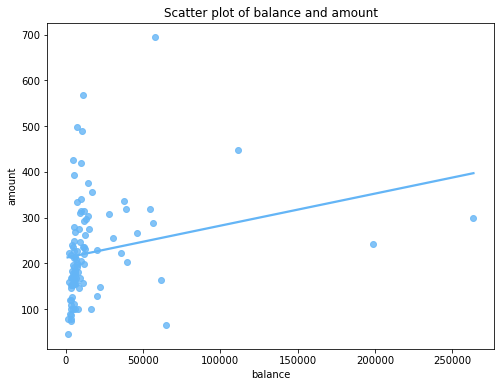

In [48]:
plt.figure(figsize=(8,6))
sns.regplot(x = 'balance', y = 'amount', color = "#64b5f6", ci = None, data = df)
plt.title('Scatter plot of balance and amount')
plt.show()

## Regression Model